In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex" : "True",
    "font.family": "Times"
})

from tqdm import tqdm

from scipy.linalg import eigh, norm, expm
from scipy.optimize import curve_fit

In [15]:
def Ham_ST(N,eps_a,eps_b,t_aa,t_ab,t_bb,omega0,g,n_site):
    
    H = np.diag([eps_b/2,eps_a/2]*N + [omega0/2])
    H += np.diag([-t_ab]*(2*N -1) + [0],k=1)
    H += np.diag([-t_bb,-t_aa]*(N-1) + [0],k=2)

    H[0,2*N-2] -= t_bb
    H[0,2*N-1] -= t_ab
    H[n_site,-1] -= g #coupling to an A site in the middle

    H += np.conjugate(H.transpose())
    
    return H

In [16]:
def time_evol(t,H):
    
    n = np.shape(H)[0]-1
    psi_in = np.array([0.]*n + [1.])
    pop = []
    phot = np.zeros((n,len(t)),dtype=np.complex128)

    for i in tqdm(np.arange(0,len(t),1)):
        temp = (expm(-1.j*H*t[i])@psi_in)
        phot[:,i] = temp[:-1]
        pop.append(temp[-1])
    
    return pop, phot

In [17]:
def JC_atom(t,g,det):
    
    om = np.sqrt(det**2 + 4.*(g**2))
    
    return 1. - (4*(g**2)/(om**2))*np.sin(t*om/2)**2

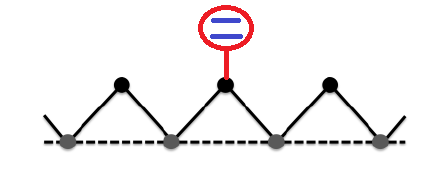

In [18]:
from IPython import display
display.Image("sawtooth_em.png")

In this notebook we study the coupling of several quantum emitters to the sawtooth lattice in different energetic and topological configurations.

# A quantum emitter locally coupled to the sawtooth lattice

We set the optimal parameters to get a flat band.

In [20]:
N = 200 #number of primitive cells
n = 2*N #number of points

eps_a = eps_b = 0.

t_aa = 0.
t_ab = np.sqrt(2)
t_bb = 1.

We couple the atom to an A site using the hamiltonian
\begin{equation}
    H = g \, (\sigma^+ a_n + \sigma^- a_n^{\dagger})
\end{equation}
where $\sigma^{+(-)}$ are the two-level atom (TLA) ladder operators and $a_n$ is the annihilation operator of a field excitation in the n-th A-site. 

## Coupling to an A site

We choose here the transition frequency of the atom ($\omega_0$) and the coupling strenght $g$.

In [21]:
omega0 = 2.0 #atom frequency
g = 0.1 #atom-cavity coupling

In [22]:
H = Ham_ST(N,eps_a,eps_b,t_aa,t_ab,t_bb,omega0,g,N-1)

We calculate the state
\begin{equation}
    |\Psi(t)\rangle = e^{-i\,H\,t} |e,vac\rangle
\end{equation}

In [23]:
t = np.linspace(0,80,150)
pop, phot = time_evol(t,H)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:28<00:00,  5.19it/s]


In [110]:
(fac/(0.1/np.sqrt(1- 1/np.sqrt(3))))**(-1)

0.066877782666124

We plot here the time evolution of the atomic part of the wavefunction.

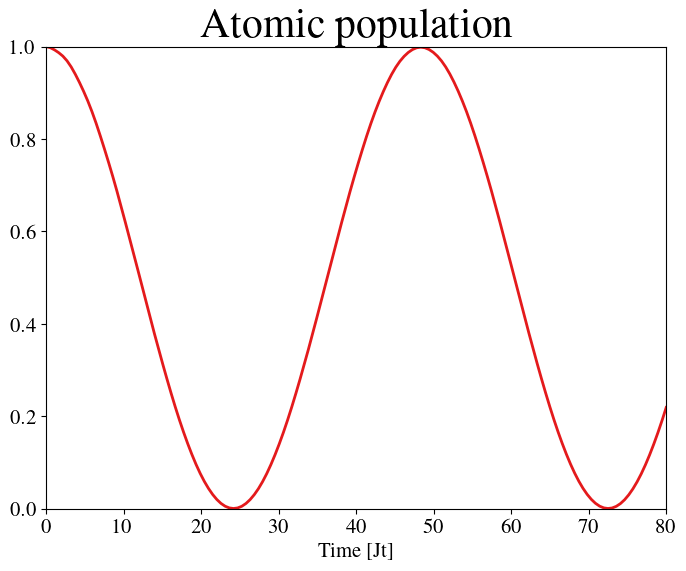

In [24]:
fig = plt.figure(figsize=(8,6))

fac = 1.9498285473526304
pop_at = np.real(pop*np.conjugate(pop))
plt.plot(t,pop_at,c='#e41a1c',lw=2)
#plt.plot(t,JC_atom(t,fac*g/3,omega0-2),ls="--",label="Fit",c='#dede00')

plt.title(f"Atomic population",fontsize=30)
plt.xlabel("Time [Jt]",fontsize=15)

plt.xlim(0,t[-1])
plt.ylim(0.,1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.savefig(f"plots/Asite/at_A_{omega0*100:.0f}.png")
plt.show()

In [25]:
np.where(pop_at == min(pop_at[:150]))

(array([135], dtype=int64),)

In [26]:
pop_phot = np.zeros((n,len(t)))

for i in range(len(t)):
    pop_phot[:,i] = np.real(phot[:,i]*np.conjugate(phot[:,i]))

In [27]:
vec = [50,70,11]

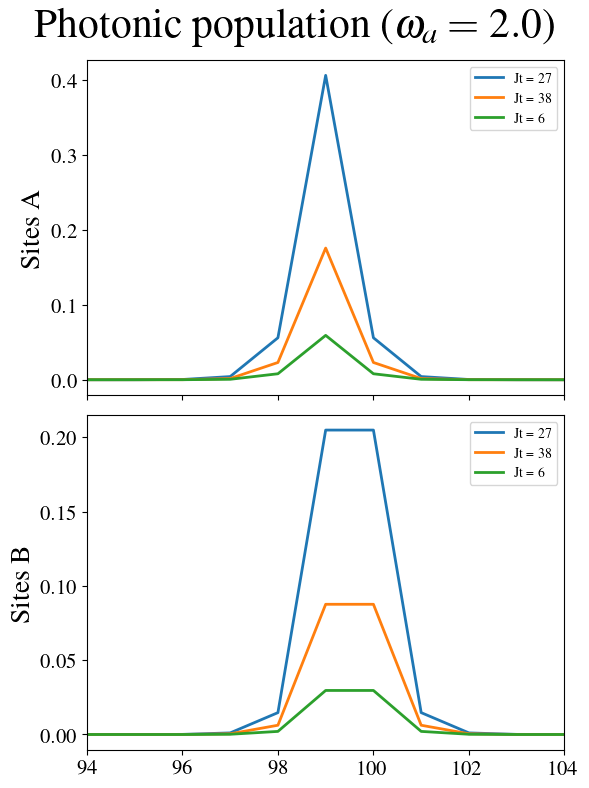

In [28]:
fig, ax = plt.subplots(figsize=(6,8),nrows=2,ncols=1,sharex=True,tight_layout=0)

for s in vec:
    ax[0].plot(pop_phot[1::2,s],label=f"Jt = {t[s]:.0f}",lw=2)
    ax[1].plot(pop_phot[::2,s],label=f"Jt = {t[s]:.0f}",lw=2)


plt.suptitle(f"Photonic population ($\omega_a = {omega0:.1f}$)",fontsize=30)
#plt.xlabel("\# Site",fontsize=20)

plt.xlim(94,104)
ax[0].set_ylabel("Sites A",fontsize=20)
ax[1].set_ylabel("Sites B",fontsize=20)
#ax[0].set_ylim(0,2e-3)
#ax[1].set_ylim(0,2e-3)

ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize=10)
ax[1].legend(fontsize=10)

#plt.savefig(f"plots/Asite/phot_A_{omega0*100:.0f}.png")

plt.show()

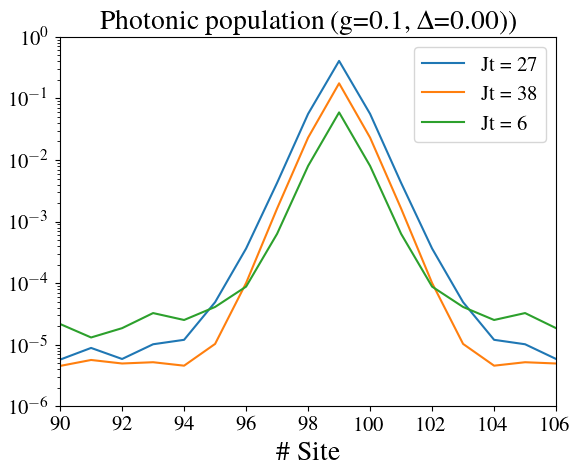

In [29]:
fig = plt.figure()

for s in vec:
    plt.plot(pop_phot[1::2,s],label=f"Jt = {t[s]:.0f}")

plt.title(f"Photonic population (g={g:.1f}, $\Delta$={omega0-2.:.2f}))",fontsize=20)
plt.xlabel("\# Site",fontsize=20)

plt.xlim(90,106)
plt.ylim(1e-6,1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale("log")
plt.legend(fontsize=15)

#plt.savefig(f"plots/phot_A_log_{omega0*100:.0f}.png")

plt.show()

## Coupling to a B site

We couple the atom to a B site using the hamiltonian
\begin{equation}
    H = g \, (\sigma^+ b_n + \sigma^- b_n^{\dagger})
\end{equation}
where $\sigma^{+(-)}$ are the two-level atom (TLA) ladder operators and $b_n$ is the annihilation operator of a field excitation in the n-th B-site. 

In [30]:
omega0 = 2.#atom frequency
g = 0.1 #atom-cavity coupling

In [31]:
H = Ham_ST(N,eps_a,eps_b,t_aa,t_ab,t_bb,omega0,g,N-2)

We calculate the state
\begin{equation}
    |\Psi(t)\rangle = e^{-i\,H\,t} |e,vac\rangle
\end{equation}

In [32]:
t = np.linspace(0,80,150)
pop, phot = time_evol(t,H)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:29<00:00,  5.02it/s]


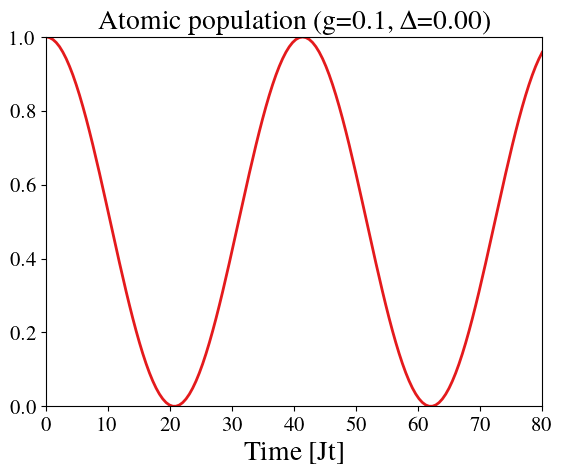

In [33]:
fig = plt.figure()

fac = 2.3
pop_at = np.real(pop*np.conjugate(pop))
plt.plot(t,pop_at,c='#e41a1c',lw=2)

plt.title(f"Atomic population (g={g:.1f}, $\Delta$={omega0-2.:.2f})",fontsize=20)
plt.xlabel("Time [Jt]",fontsize=20)

plt.xlim(0,t[-1])
plt.ylim(0.,1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.savefig(f"plots/Bsite/at_B_{omega0*100:.0f}.png")
plt.show()

In [34]:
np.where(pop_at == min(pop_at[:20]))

(array([19], dtype=int64),)

In [35]:
pop_phot = np.zeros((n,len(t)))

for i in range(len(t)):
    pop_phot[:,i] = np.real(phot[:,i]*np.conjugate(phot[:,i]))

In [36]:
vec = [6,25,50]

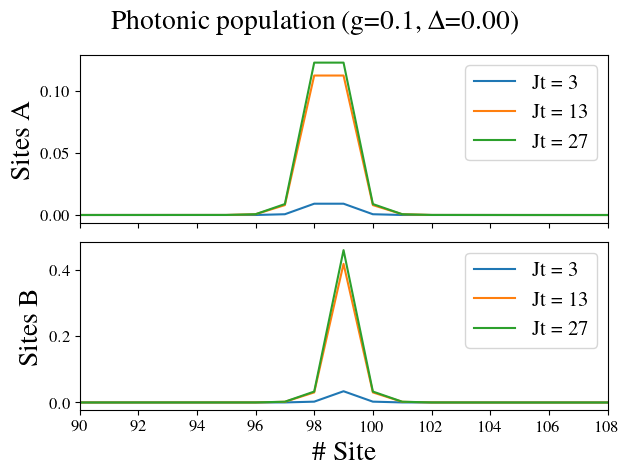

In [37]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True,tight_layout=True)

for s in vec:
    ax[0].plot(pop_phot[1::2,s],label=f"Jt = {t[s]:.0f}")
    ax[1].plot(pop_phot[::2,s],label=f"Jt = {t[s]:.0f}")


plt.suptitle(f"Photonic population (g={g:.1f}, $\Delta$={omega0-2.:.2f})",fontsize=20)
plt.xlabel("\# Site",fontsize=20)

plt.xlim(90,108)
ax[0].set_ylabel("Sites A",fontsize=20)
ax[1].set_ylabel("Sites B",fontsize=20)
#ax[0].set_ylim(0,3e-3)
#ax[1].set_ylim(0,3e-3)

ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

#plt.savefig(f"plots/Bsite/phot_B_{omega0*100:.0f}.png")

plt.show()

## Comparison

### Equal g, different $\omega_0$

In [9]:
omega0 = np.arange(1.5,2.51,0.1)
g = 0.1

In [10]:
t = [10.]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.97it/s]


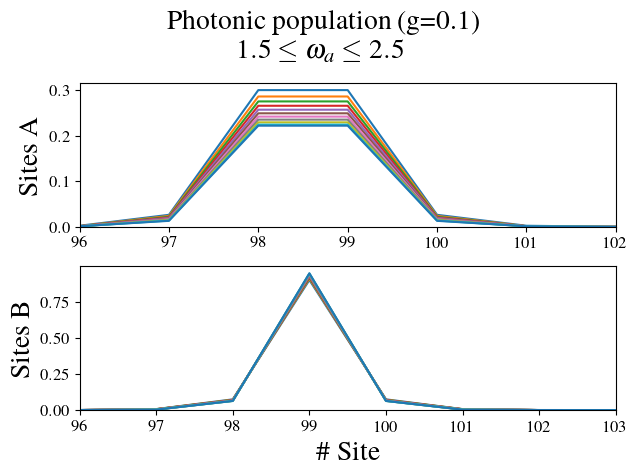

In [11]:
fig, ax = plt.subplots(nrows=2,ncols=1,tight_layout=True)

for s in range(len(omega0)):
    H = Ham_ST(N,eps_a,eps_b,t_aa,t_ab,t_bb,omega0[s],g,N-2)
    pop, phot = time_evol(t,H)
    
    pop_phot = np.zeros((n,len(t)))
    for i in range(len(t)):
        pop_phot[:,i] = np.real(phot[:,i]*np.conjugate(phot[:,i]))
        temp = norm(pop_phot[:,i])
        pop_phot[:,i] /= temp

    ax[0].plot(pop_phot[1::2,0],label=f"$\omega_0$ = {omega0[s]:.1f}")
    ax[1].plot(pop_phot[::2,0])


plt.suptitle(f"Photonic population (g={g:.1f})\n $1.5 \leq \omega_a \leq 2.5$",fontsize=20)
plt.xlabel("\# Site",fontsize=20)

ax[0].set_xlim(96,102)
ax[1].set_xlim(96,103)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_ylabel("Sites A",fontsize=20)
ax[1].set_ylabel("Sites B",fontsize=20)

ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
#ax[0].legend()

#plt.savefig("comp_omega_B.png")

plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.35it/s]


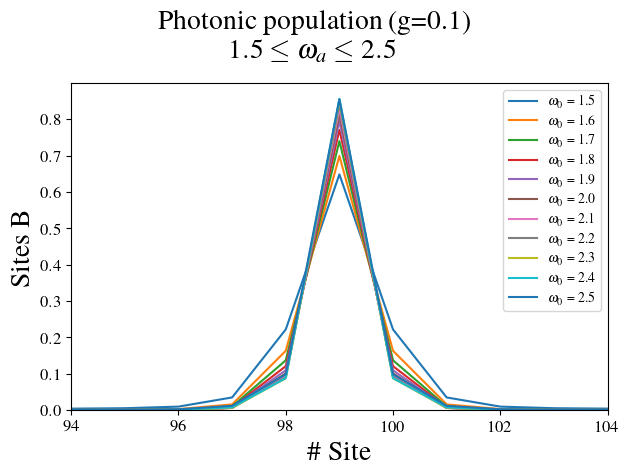

In [13]:
fig, ax = plt.subplots(tight_layout=True)

for s in range(len(omega0)):
    H = Ham_ST(N,eps_a,eps_b,t_aa,t_ab,t_bb,omega0[s],g,N-1)
    pop, phot = time_evol(t,H)
    
    pop_phot = np.zeros((n,len(t)))
    for i in range(len(t)):
        pop_phot[:,i] = np.real(phot[:,i]*np.conjugate(phot[:,i]))
        temp = norm(pop_phot[:,i])
        pop_phot[:,i] /= temp

    ax.plot(pop_phot[1::2,0],label=f"$\omega_0$ = {omega0[s]:.1f}")


plt.suptitle(f"Photonic population (g={g:.1f})\n $1.5 \leq \omega_a \leq 2.5$",fontsize=20)
plt.xlabel("\# Site",fontsize=20)

ax.set_xlim(94,104)
ax.set_ylim(0)
ax.set_ylabel("Sites B",fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend()

plt.savefig("comp_omega2.png",dpi=400)

plt.show()

### Equal $\omega_0$, different g

In [14]:
omega0 = 2.
g = [0.01,0.05,0.07,0.1,0.15,0.2,0.3,0.4]

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.30it/s]


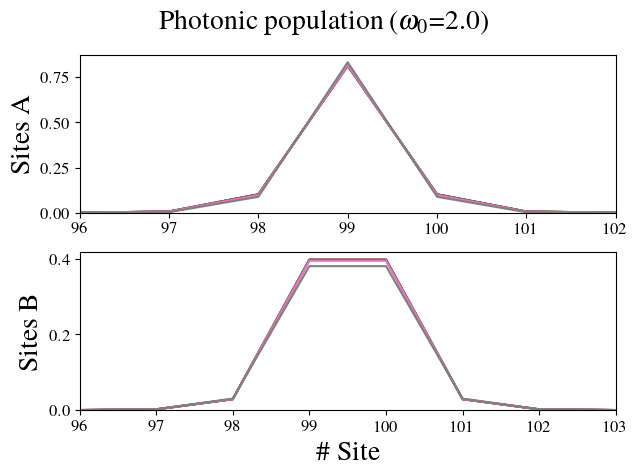

In [15]:
fig, ax = plt.subplots(nrows=2,ncols=1,tight_layout=True)

for s in range(len(g)):
    H = Ham_ST(N,eps_a,eps_b,t_aa,t_ab,t_bb,omega0,g[s],N-1)
    pop, phot = time_evol(t,H)
    
    pop_phot = np.zeros((n,len(t)))
    for i in range(len(t)):
        pop_phot[:,i] = np.real(phot[:,i]*np.conjugate(phot[:,i]))
        temp = norm(pop_phot[:,i])
        pop_phot[:,i] /= temp

    ax[0].plot(pop_phot[1::2,0],label=f"$g = {g[s]:.2f}")
    ax[1].plot(pop_phot[::2,0])


plt.suptitle(f"Photonic population ($\omega_0$={omega0:.1f})",fontsize=20)
plt.xlabel("\# Site",fontsize=20)

ax[0].set_xlim(96,102)
ax[1].set_xlim(96,103)
ax[0].set_ylim(0)
ax[1].set_ylim(0)
ax[0].set_ylabel("Sites A",fontsize=20)
ax[1].set_ylabel("Sites B",fontsize=20)

ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
#ax[0].legend()

#plt.savefig("comp_g.png")

plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.32it/s]


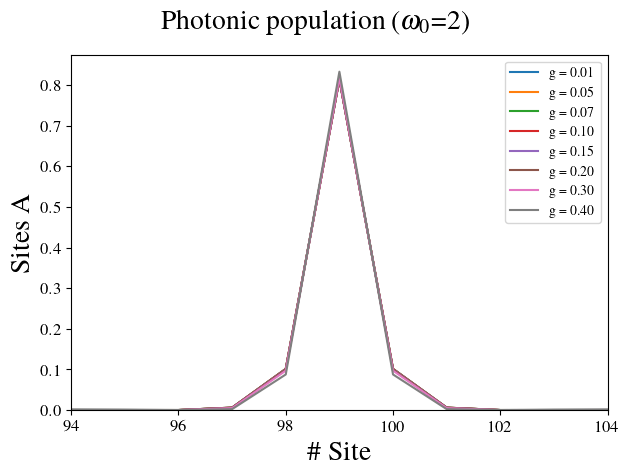

In [16]:
fig, ax = plt.subplots(tight_layout=True)

for s in range(len(g)):
    H = Ham_ST(N,eps_a,eps_b,t_aa,t_ab,t_bb,omega0,g[s],N-1)
    pop, phot = time_evol(t,H)
    
    pop_phot = np.zeros((n,len(t)))
    for i in range(len(t)):
        pop_phot[:,i] = np.real(phot[:,i]*np.conjugate(phot[:,i]))
        temp = norm(pop_phot[:,i])
        pop_phot[:,i] /= temp

    ax.plot(pop_phot[1::2,0],label=f"g = {g[s]:.2f}")


plt.suptitle(f"Photonic population ($\omega_0$={omega0:.0f})",fontsize=20)
plt.xlabel("\# Site",fontsize=20)

ax.set_xlim(94,104)
ax.set_ylim(0)
ax.set_ylabel("Sites A",fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend()

#plt.savefig("comp_g2.png",dpi=400)

plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.04it/s]


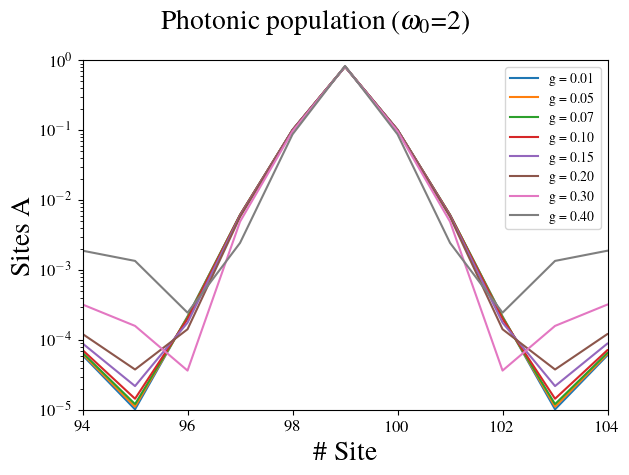

In [159]:
fig, ax = plt.subplots(tight_layout=True)

for s in range(len(g)):
    H = Ham_ST(N,eps_a,eps_b,t_aa,t_ab,t_bb,omega0,g[s],N-1)
    pop, phot = time_evol(t,H)
    
    pop_phot = np.zeros((n,len(t)))
    for i in range(len(t)):
        pop_phot[:,i] = np.real(phot[:,i]*np.conjugate(phot[:,i]))
        temp = norm(pop_phot[:,i])
        pop_phot[:,i] /= temp

    ax.plot(pop_phot[1::2,0],label=f"g = {g[s]:.2f}")


plt.suptitle(f"Photonic population ($\omega_0$={omega0:.0f})",fontsize=20)
plt.xlabel("\# Site",fontsize=20)

ax.set_xlim(94,104)
ax.set_ylim(1e-5,1)
#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Sites A",fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend()

plt.savefig("comp_g3.png",dpi=400)

plt.show()

# Two quantum emitters coupled to the sawtooth lattice

In [88]:
omega0 = 2.0 #atom frequency
g = 0.1 #atom-cavity coupling

In [89]:
H = np.diag([eps_b/2,eps_a/2]*N + [omega0/2,omega0/2])
H += np.diag([-t_ab]*(2*N -1) + [0,0],k=1)
H += np.diag([-t_bb,-t_aa]*(N-1) + [0,0],k=2)

d = 1
H[0,n-2] -= t_bb
H[0,n-1] -= t_ab
H[N,-1] -= g
H[N+d,-2] -= g

H += np.conjugate(H.transpose())

In [100]:
psi_in = np.array([0.]*n + [0.,1.])
pop1 = []
pop2 = []
phot = np.zeros((n,len(t)),dtype=np.complex128)

for i in tqdm(np.arange(0,len(t),1)):
    temp = (expm(-1.j*H*t[i])@psi_in)
    phot[:,i] = temp[:-2]
    pop1.append(temp[-2])
    pop2.append(temp[-1])

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:30<00:00,  4.99it/s]


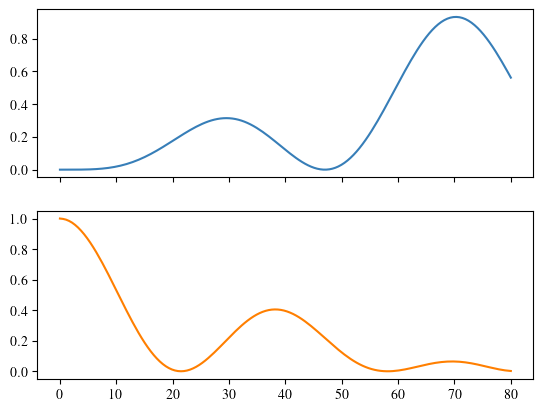

In [101]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True)

ax[0].plot(t,pop1*np.conjugate(pop1),color="#377eb8")
ax[1].plot(t,pop2*np.conjugate(pop2),color='#ff7f00')



#plt.savefig("eig_FB.pdf")
plt.show()

In [105]:
pop_phot = np.zeros((n,len(t)))

for i in range(len(t)):
    pop_phot[:,i] = np.real(phot[:,i]*np.conjugate(phot[:,i]))

In [106]:
vec = [10,50,100]

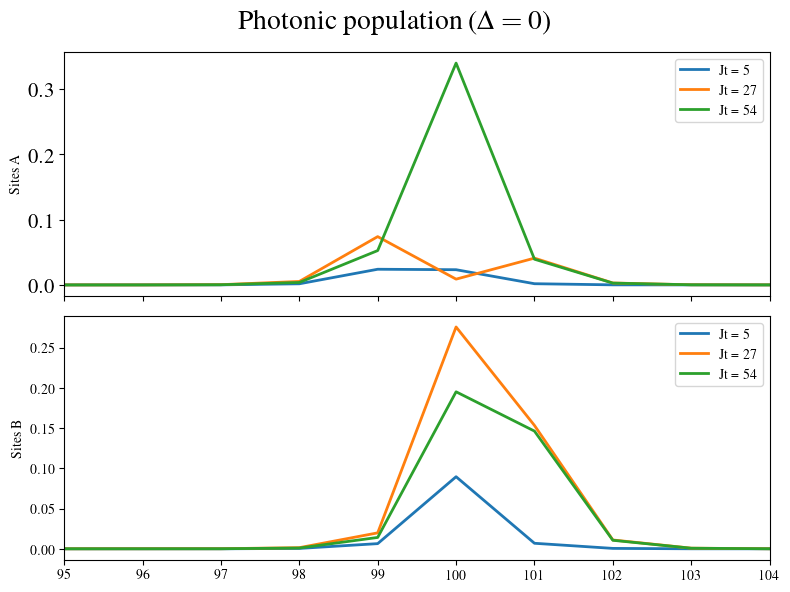

In [107]:
fig, ax = plt.subplots(figsize=(8,6),nrows=2,ncols=1,sharex=True,tight_layout=0)

for s in vec:
    ax[0].plot(pop_phot[1::2,s],label=f"Jt = {t[s]:.0f}",lw=2)
    ax[1].plot(pop_phot[::2,s],label=f"Jt = {t[s]:.0f}",lw=2)


plt.suptitle(f"Photonic population ($\Delta = 0$)",fontsize=20)
#plt.xlabel("\# Site",fontsize=20)

plt.xlim(95,104)
ax[0].set_ylabel("Sites A",fontsize=10)
ax[1].set_ylabel("Sites B",fontsize=10)
#ax[0].set_ylim(0,2e-3)
#ax[1].set_ylim(0,2e-3)

ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=10)
ax[0].legend(fontsize=10)
ax[1].legend(fontsize=10)


plt.show()

# A giant atom coupled to the sawtooth lattice

We use giant atoms to engineer couplings to multiple points. The resulting interaction hamiltonian will be in the form
\begin{equation}
    H = \sum_p (g_p\,e^{ikx_p} \, a^\dagger_p \, \sigma^- + \text{h. c.}) 
\end{equation}
where the index $p$ runs over all the touching points.

## Coupling to two points: isolating the FB

In [84]:
omega0 = -2. #atom frequency
g = 0.1 #atom-cavity coupling

In [85]:
H = np.diag([eps_b/2,eps_a/2]*N + [omega0/2])
H += np.diag([-t_ab]*(2*N -1) + [0],k=1)
H += np.diag([-t_bb,-t_aa]*(N-1) + [0],k=2)

H[0,2*N-2] -= t_bb
H[N+1,-1] -= g*(3-np.sqrt(3))/3
H[N+2,-1] += g*(np.sqrt(3)-1)/np.sqrt(6)

H += np.conjugate(H.transpose())

In [91]:
eigvals, eigvect = eigh(H)

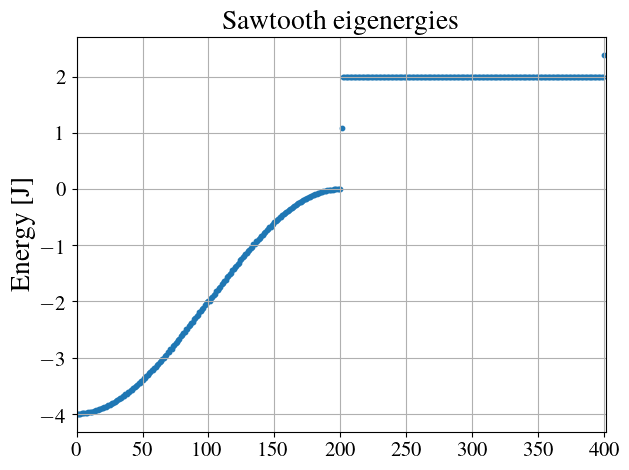

In [92]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigvals)),eigvals,s=10)

ax.set_title("Sawtooth eigenergies",fontsize=20)
ax.set_ylabel(r"Energy [J]",fontsize=20)

ax.set_xlim(0,len(eigvals))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid()
#plt.savefig("spectrum_sawtooth.png")
plt.show()

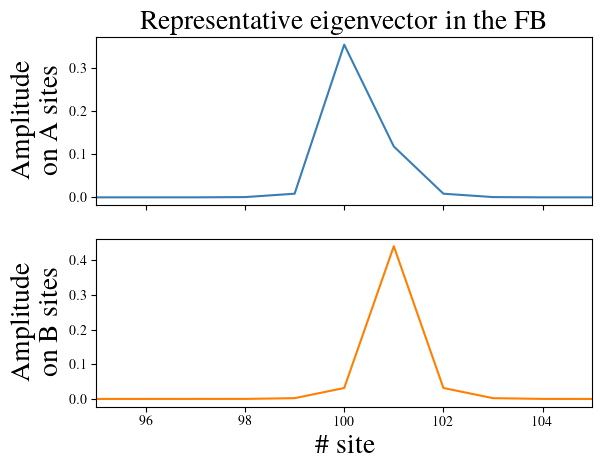

In [104]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True)

ax[0].plot(eigvect[1:-1:2,-2]**2,color="#377eb8")
ax[1].plot(eigvect[:-1:2,-2]**2,color='#ff7f00')

ax[0].set_title("Representative eigenvector in the FB",fontsize=20)
ax[1].set_xlabel("\# site",fontsize=20)
ax[0].set_ylabel("Amplitude \n on A sites",fontsize=20)
ax[1].set_ylabel("Amplitude \n on B sites",fontsize=20)

ax[1].set_xlim(95,105)

#plt.savefig("eig_FB.pdf")
plt.show()

In [86]:
t = np.linspace(0,80,100)
pop, phot = time_evol(t,H)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  5.00it/s]


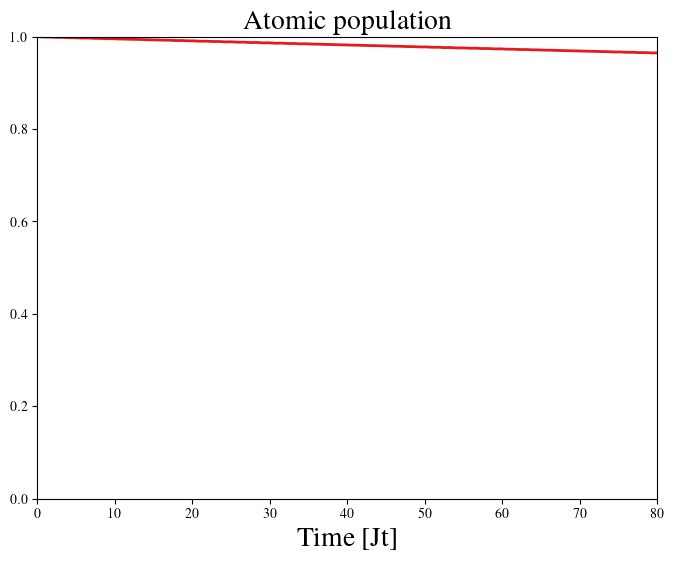

In [87]:
fig = plt.figure(figsize=(8,6))

fac = 1.9498285473526304
pop_at = np.real(pop*np.conjugate(pop))
plt.plot(t,pop_at,c='#e41a1c',lw=2,label="Data")
#plt.plot(t,JC_atom(t,fac*g/3,omega0-2),ls="--",label="Fit",c='#dede00')

plt.title(f"Atomic population",fontsize=20)
plt.xlabel("Time [Jt]",fontsize=20)

plt.xlim(0,t[-1])
plt.ylim(0.,1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#plt.savefig(f"plots/Asite/at_A_{omega0*100:.0f}.png")
plt.show()

In [88]:
pop_phot = np.zeros((n,len(t)))

for i in range(len(t)):
    pop_phot[:,i] = np.real(phot[:,i]*np.conjugate(phot[:,i]))

In [89]:
vec = [10,50,70]

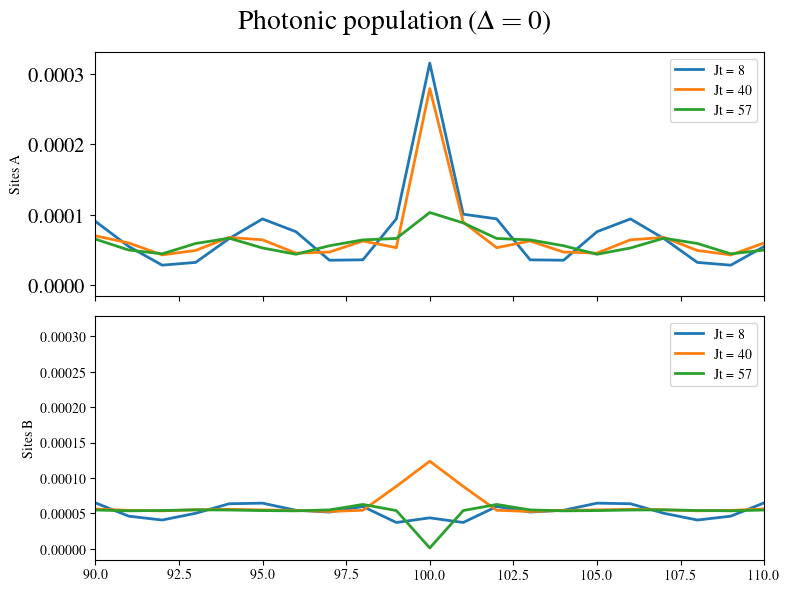

In [90]:
fig, ax = plt.subplots(figsize=(8,6),nrows=2,ncols=1,sharex=True,tight_layout=0)

for s in vec:
    ax[0].plot(pop_phot[1::2,s],label=f"Jt = {t[s]:.0f}",lw=2)
    ax[1].plot(pop_phot[2::2,s],label=f"Jt = {t[s]:.0f}",lw=2)


plt.suptitle(f"Photonic population ($\Delta = 0$)",fontsize=20)
#plt.xlabel("\# Site",fontsize=20)

plt.xlim(90,110)
ax[0].set_ylabel("Sites A",fontsize=10)
ax[1].set_ylabel("Sites B",fontsize=10)
#ax[0].set_ylim(0,2e-3)
#ax[1].set_ylim(1e-10,1)
#ax[1].set_yscale("log")
#ax[0].set_ylim(1e-10,1)
#ax[0].set_yscale("log")

ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=10)
ax[0].legend(fontsize=10)
ax[1].legend(fontsize=10)


plt.show()

## Coupling to three point: isolating a CLS

In [233]:
omega0 = 4. #atom frequency
g = 0.1 #atom-cavity coupling

In [234]:
H = np.diag([eps_b/2,eps_a/2]*N + [omega0/2])
H += np.diag([-t_ab]*(2*N -1) + [0],k=1)
H += np.diag([-t_bb,-t_aa]*(N-1) + [0],k=2)

H[0,2*N-2] -= t_bb
H[N,-1] += g/np.sqrt(2)
H[N-1,-1] -= g/2
H[N+1,-1] -= g/2

H += np.conjugate(H.transpose())

In [235]:
t = np.linspace(0,80,150)
pop, phot = time_evol(t,H)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:19<00:00,  7.57it/s]


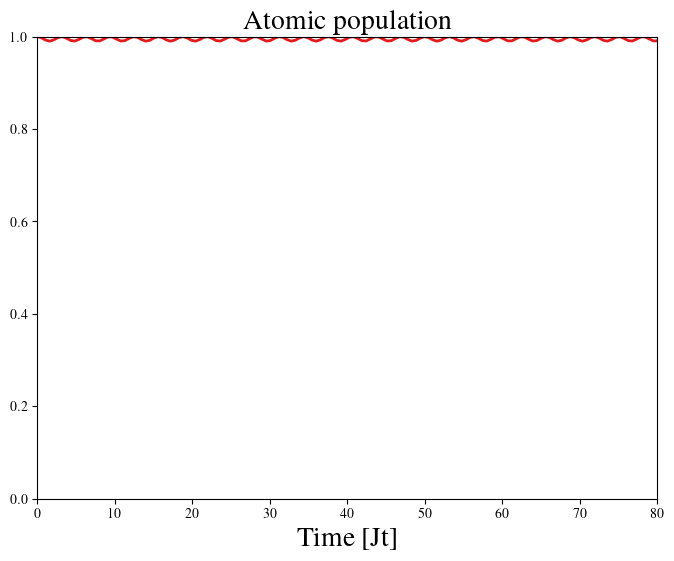

In [236]:
fig = plt.figure(figsize=(8,6))

fac = 1.9498285473526304
pop_at = np.real(pop*np.conjugate(pop))
plt.plot(t,pop_at,c='#e41a1c',lw=2,label="Data")
#plt.plot(t,JC_atom(t,fac*g/3,omega0-2),ls="--",label="Fit",c='#dede00')

plt.title(f"Atomic population",fontsize=20)
plt.xlabel("Time [Jt]",fontsize=20)

plt.xlim(0,t[-1])
plt.ylim(0.,1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#plt.savefig(f"plots/Asite/at_A_{omega0*100:.0f}.png")
plt.show()

In [237]:
np.where(pop_at == max(pop_at[1:20]))

(array([6], dtype=int64),)

In [238]:
pop_phot = np.zeros((n,len(t)))

for i in range(len(t)):
    pop_phot[:,i] = np.real(phot[:,i]*np.conjugate(phot[:,i]))

In [239]:
vec = [10,50,100]

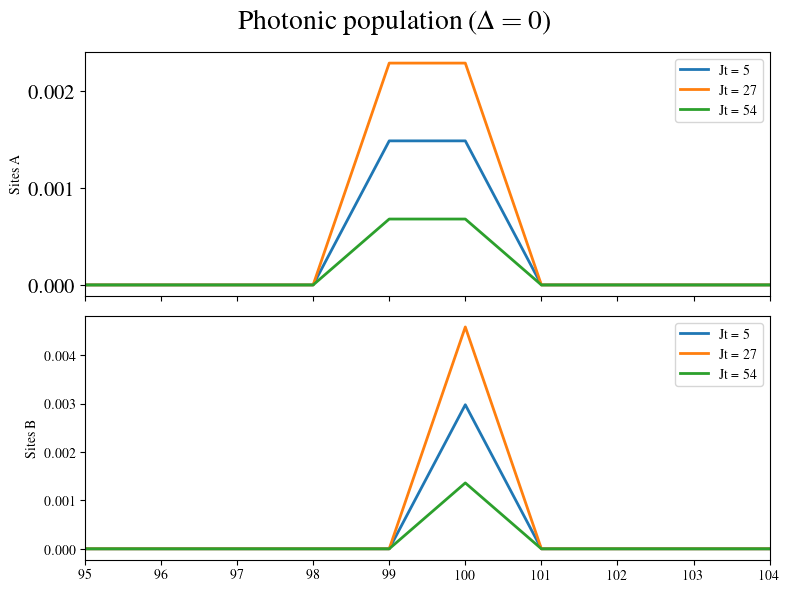

In [240]:
fig, ax = plt.subplots(figsize=(8,6),nrows=2,ncols=1,sharex=True,tight_layout=0)

for s in vec:
    ax[0].plot(pop_phot[1::2,s],label=f"Jt = {t[s]:.0f}",lw=2)
    ax[1].plot(pop_phot[::2,s],label=f"Jt = {t[s]:.0f}",lw=2)


plt.suptitle(f"Photonic population ($\Delta = 0$)",fontsize=20)
#plt.xlabel("\# Site",fontsize=20)

plt.xlim(95,104)
ax[0].set_ylabel("Sites A",fontsize=10)
ax[1].set_ylabel("Sites B",fontsize=10)
#ax[0].set_ylim(0,2e-3)
#ax[1].set_ylim(0,2e-3)

ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=10)
ax[0].legend(fontsize=10)
ax[1].legend(fontsize=10)


plt.show()